#3-1. k-최근집 이웃 회귀

- 분류: 샘플을 몇 개의 클래스 중 하나로 분류
- 회귀: 임의의 수치를 예측하는 문제, 두 변수 사이의 상관관계를 분석하는 방법

- k-최근접 이웃 분류 알고리즘: 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하여 다수의 클래스를 새로운 샘플의 클래스로 예측한다.
- k-최근접 이웃 회귀 알고리즘: 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고 이웃한 샘플의 수치를 활용하여 타깃을 예측한다.

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

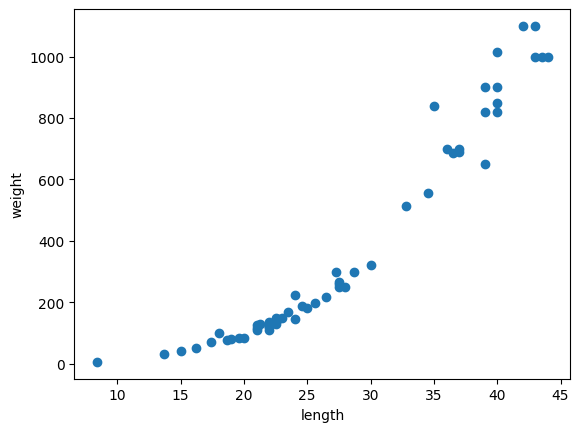

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state= 42)

- 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


- reshape(행, 열): 크기를 바꿀 수 있는 메서드

In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


- -1로 크기를 지정하면 나머지 원소 개수로 모두 채우라는 의미이다. 전체 원소 개수를 매번 외우지 않아도 돼서 편하다.
  - ex) reshape(42,1)이라고 적지 않아도 (-1,1)로 적으면 알아서 나머지 원소 개수인 42로 설정해준다.



##k-최근접 이웃 회귀

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target)) #샘플을 정확하게 분류한 개수의 비율

0.992809406101064


- 결정계수(R^2): 회귀는 예측한 값이나 타깃 모두 임의의 수치이기 때문에 결정계수로 평가한다.
- 타깃의 평균 정도를 예측한다면 0에 가까워지고, 예측이 타깃에 가까워지면 1이된다.

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction) #평균 절댓값 오차(정량적인 평가)
print(mae)

19.157142857142862


In [9]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 과대적합: 훈련세트에서는 점수가 좋았는데 테스트 세트에서 점수가 나쁠 경우
- 과소적합: 훈련세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우, 즉 모델이 너무 단순하여 훈련세트에 적절히 훈련X

In [10]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


- k-최근접 이웃 회귀에서 모델을 복잡하게 만드려면 이웃의 개수 k개를 줄이면 된다.
- 이웃의 개수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따르게 된다.

In [11]:
print(knr.score(test_input, test_target))

0.9746459963987609


#3-2. 선형 회귀

In [12]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state= 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


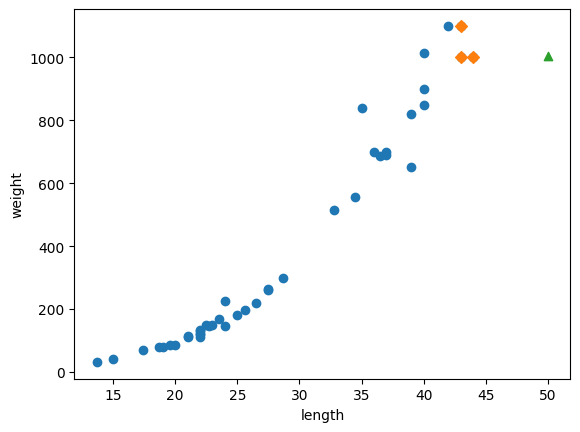

In [14]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50, 1003, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(np.mean(train_target[indexes]))

1033.3333333333333


- k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다.

In [16]:
print(knr.predict([[100]]))

[1033.33333333]


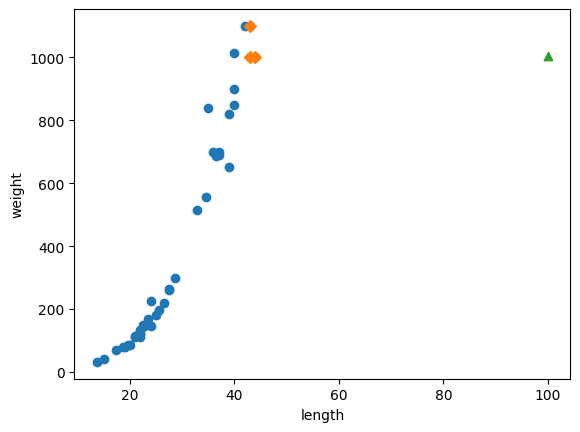

In [17]:
distance, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(100, 1003, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 이런식이면 아무리 길이가 커져도 똑같은 무게만 나올것임

## 선형회귀
: 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
- LinearRegression 사이킷런 모델 클래스는 추정기(estimator)이라고 부른다.

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [19]:
print(lr.coef_, lr.intercept_) #기울기와 절편

[39.01714496] -709.0186449535477


- y=ax+b에서 a는 기울기로 coef_를 사용하며 계수(coefficient), 가중치(weight)라고 부른다.
- 모델 파라미터: a와 b는 머신러닝 알고리즘이 찾은 값이라는 의미
- 모델 기반 학습: 모델 파라미터를 찾는 것
- 사례 기반 학습: 훈련 세트를 저장하는 것이 훈련의 전부

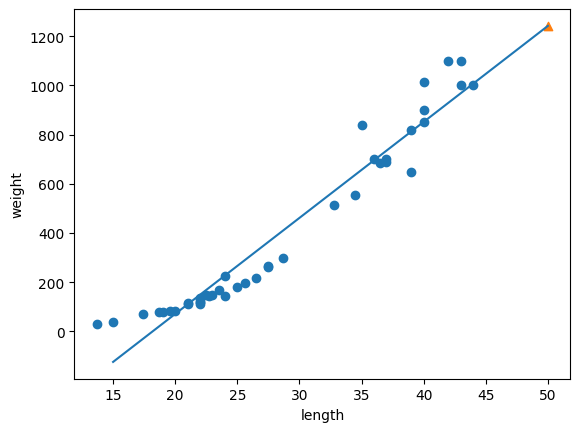

In [20]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_ +lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


##다항 회귀
: 다항식을 사용한 선형 회귀

In [22]:
train_poly = np.column_stack((train_input**2,train_input)) # 농어의 길이를 제곱해서 원래 데이터 앞에 붙힘
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [23]:
lr = LinearRegression()
lr. fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [24]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 무게 = 1.01 x 길이^2 - 21.6 X 길이 +116.05

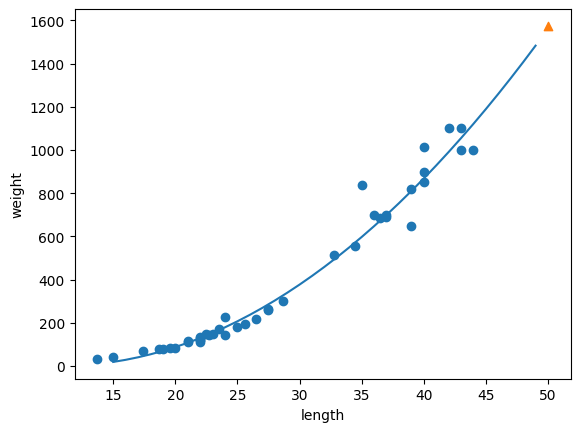

In [25]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


#3-3. 특성 공학과 규제

##특성 공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [27]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv') #웹브라우저 파일을 읽어서 데이터프레임으로 만든다.
perch_full = df.to_numpy() #넘파이 배열로 바꾼다.
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

- 판다스: 유명한 데이터 분석 라이브러리
- 데이터프레임은 판다스의 핵심 데이터 구조, 넘파이 배열로 바꿀 수도 있음

In [28]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [29]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

- 변환기: 사이킷런이 특성을 만들거나 전처리하기 위해 제공하는 다양한 클래스
- 사이킷런의 모델 클래스에 일관된 fit(), score(), predict() 메서드 존재
- 변환기 클래스는 fit(), transform() 메서드 제공

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- PolynomialFeatures 클래스는 각 특성을 제곱한 항, 특성끼리 서로 곱한 항을 추가한다.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


- 1은 선형 방정식의 절편이 항상 값이 특성과 곱해지는 계수이다.
- 이렇게 특성을 만들 필요가 없으므로 include_bias=False을 설정한다.
- 사이킷런 모델은 자동으로 특성에 추가된 절쳔 항을 무시하지만 혼돈을 피하기 위해 명시적으로 지정한다.

In [32]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
#print(train_input.shape)
print(train_poly.shape)

(42, 9)


In [33]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

- x0은 첫번째 특성, x0^2은 첫번째 특성의 제곱, x0 x1은 첫번째 특성과 두번째 특성의 곱

In [34]:
test_poly = poly.transform(test_input)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


- 특성이 늘어나면 선형 회귀의 능력은 매우 강하다

In [36]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [37]:
poly = PolynomialFeatures(degree = 5, include_bias=False) #5제곱
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [38]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [39]:
print(lr.score(test_poly, test_target))

-144.40579436844948


- 특성의 개수가 많으면 훈련세트에 너무 과대적합되므로 테스트 세트에서 형편없는 점수를 만든다.

##규제
: 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #표준점수 구하는 것
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- 훈련세트에서 학습한 평균과 표준 편차는 StandardScaler 클래스 객체의 mean_, scale_속성에 저장된다.

### 릿지 회귀
: 계수를 제곱한 값을 기준으로 규제

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [42]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


- alpha 매개변수로 규제 강도를 조절하는데,
  - alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 과소 적합되도록 유도,
  - alpha값이 작으면 계수 값이 커져 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

In [43]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [44]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

- alpha 값을 0.001부터 10배씩 늘렷기 때문에 그대로 그래프를 그리면 그래프 왼쪽이 촘촘해진다.
- log함수를 적용해서 지수로 표현한다.

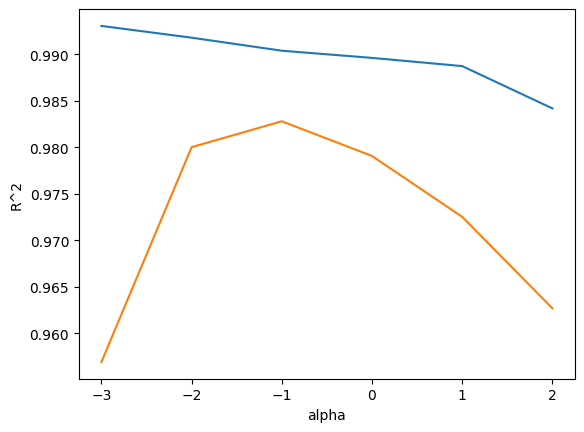

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 왼쪽 그래프는 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습이다.
- 오른족 그래프는 훈련세트와 테스트 세트의 점수가 모두 낮아지는 과소적합 모습이다.
- 적절한 alpha 값: 두 그래프가 가장 가까운 -1, 즉 0.1이다.

In [46]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀
: 계수의 절댓값을 기준으로 규제 적용

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [48]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [49]:
train_score=[]
test_score=[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=1000)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

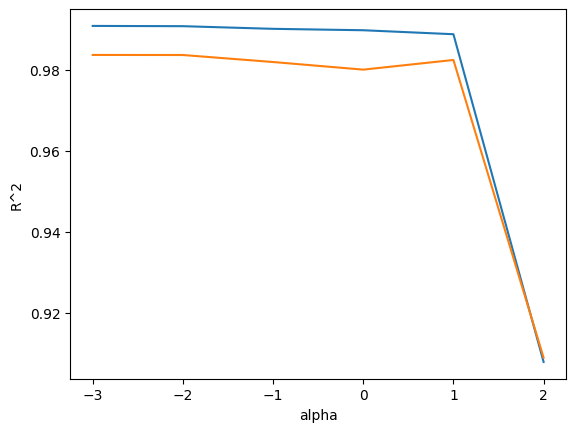

In [50]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 적절한 alpha 값: 1, 즉 10

In [51]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


- 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다.

In [52]:
print(np.sum(lasso.coef_ == 0)) #라쏘의 계수가 0일때의 개수 세기

40


- 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개 밖에 되지 않는다.
- 이런 특성으로 라쏘 모델은 유용한 특성을 골라내는 용도로 사용할 수 있다.